# Tyler's Workspace

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read in the data and change the 2nd column into datetime
housing_df = pd.read_csv('./data/kc_house_data.csv', parse_dates=[1])

In [3]:
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
# sqft_basement is currently an object type, we'll need to change it to numbers to use it
# Has zipcode as int64, we need to change it to a categorical variable to use it
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [5]:
# if we drop the 454 houses with no basement data, we would lose 2% of our data
housing_df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1930.0        1
243.0         1
1024.0        1
4130.0        1
417.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [6]:
import scipy.stats as stats

In [7]:
# I'm curious if there is a significant difference in price for those without basement data
na_basement = housing_df[housing_df['sqft_basement'] == '?']
stats.ttest_ind(na_basement['price'], housing_df['price'])

Ttest_indResult(statistic=-0.5735124870172023, pvalue=0.566303596077609)

In [8]:
# awesome, they're not significantly different from the population, let's drop them
housing_df = housing_df[housing_df['sqft_basement'] != '?']

In [9]:
housing_df['sqft_basement'] = housing_df['sqft_basement'].astype(float)

<ipython-input-9-dd799b41ef97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['sqft_basement'] = housing_df['sqft_basement'].astype(float)


In [10]:
no_price_df = housing_df.drop(['price'], axis=1)

In [11]:
housing_df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702328
sqft_above       0.605143
sqft_living15    0.586415
bathrooms        0.525889
sqft_basement    0.325008
bedrooms         0.309204
lat              0.306507
floors           0.256355
yr_renovated     0.128227
sqft_lot         0.087937
sqft_lot15       0.083192
yr_built         0.054459
long             0.022101
id              -0.015796
zipcode         -0.053166
Name: price, dtype: float64

<AxesSubplot:>

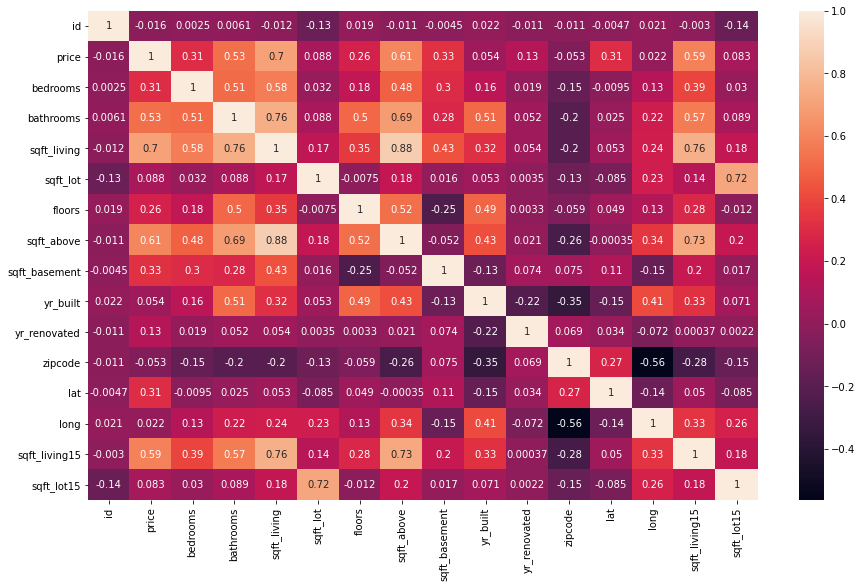

In [12]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(housing_df.corr(), annot=True)


<AxesSubplot:>

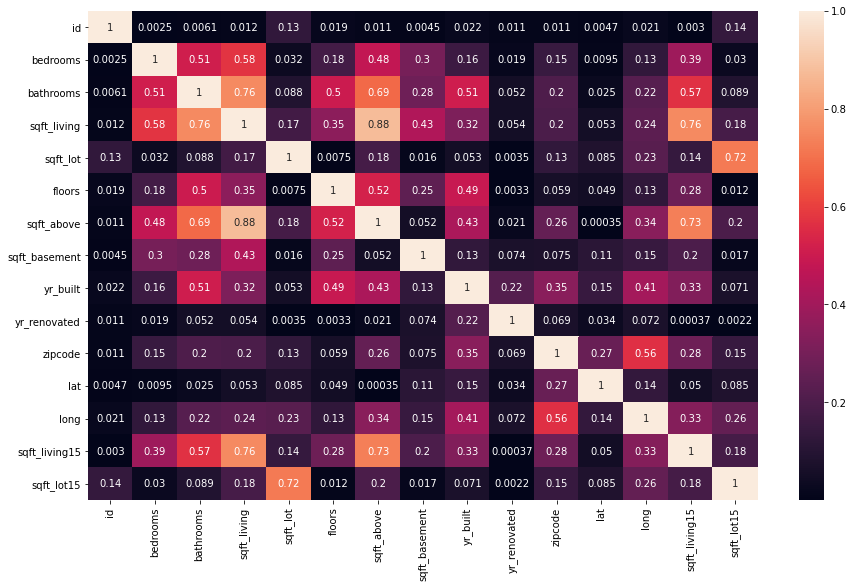

In [13]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(abs(no_price_df.corr()), annot=True)


In [14]:
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,17389.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,4.581004e+09,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,1789.069006,291.851724,1971.023223,82.991949,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,2.876328e+09,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,828.409769,442.498337,29.321938,398.481819,53.535756,0.138591,0.140597,685.67034,27169.273663
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,7.309100e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


In [15]:
housing_df.describe(include='object')

,waterfront,view,condition,grade
count,18804,21082,21143,21143
unique,2,5,5,11
top,NO,NONE,Average,7 Average
freq,18662,19018,13726,8788


In [16]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

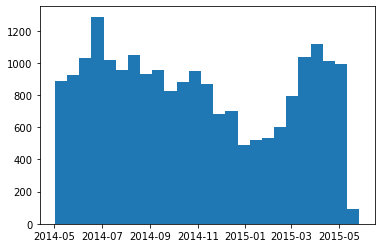

In [17]:
# I just want to see the distributions for all the variables
plt.hist(housing_df['date'], bins=25);
# looks kind of like a bimodal thing where house sales go down in the winter
# when I used more bins, it just seemed to add extra noise by highlighting specific
# days of the week or something, so I decided to use a smaller amount of bins to round it off

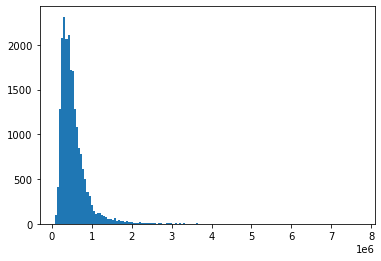

In [18]:
plt.hist(housing_df['price'], bins=(round(len(housing_df)**.5)));
# this one looks like it needs a log transform, which makes sense

<ipython-input-21-36130769afae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['log_price'] = np.log(housing_df['price'])


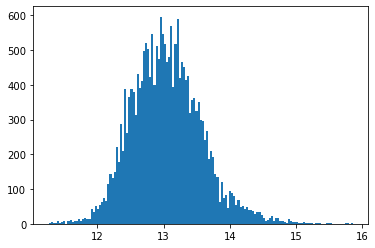

In [21]:
housing_df['log_price'] = np.log(housing_df['price'])
plt.hist(housing_df['log_price'], bins=std_bins);
# looks so much better

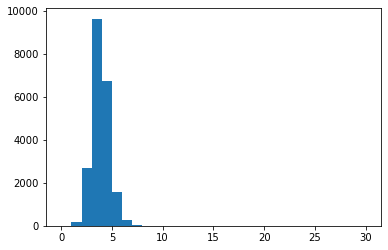

In [22]:
bins = np.array(range(0, 31))
plt.hist(housing_df['bedrooms'], bins=bins);
# used range to make the bedrooms make sense
# looks like we may need a log transform on this one, which will be a little funky
# given the small numbers we would be working with
# honestly may be worth chopping off the outliers in this data set 
# considering the vast majority of houses will have well under 10 bedrooms
# the mansion market will probably work by different rules than the housing market

<ipython-input-23-418186e71776>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['log_bedrooms'] = np.log(housing_df['bedrooms'])


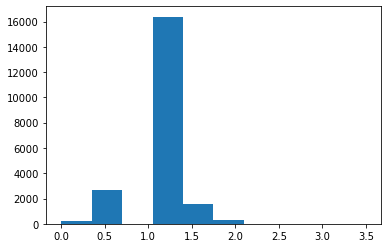

In [23]:
housing_df['log_bedrooms'] = np.log(housing_df['bedrooms'])
plt.hist(housing_df['log_bedrooms'], bins=10);
# this transformation is not worth it, way too messy

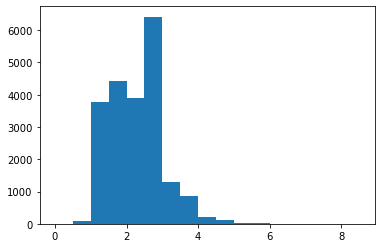

In [24]:
bins = np.array(range(0, 18)) * .5
plt.hist(housing_df['bathrooms'], bins=bins);
# looks a little more regular than the last one, hard to work with 
# did this histogram in increments of .5 since you can have 1.5 baths
# looks a little more regular suprisingly, still worth looking at a transform though

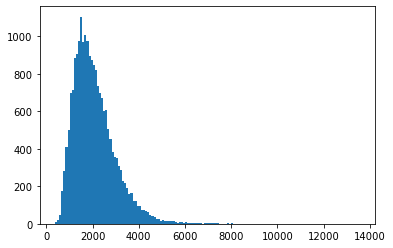

In [25]:
std_bins = round(len(housing_df)**.5)
plt.hist(housing_df['sqft_living'], bins=std_bins);
# once again right skew, which makes sense given the wealth distribution in America
# try a log transform

<ipython-input-26-3b9516d5a0a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['log_sqft_living'] = np.log(housing_df['sqft_living'])


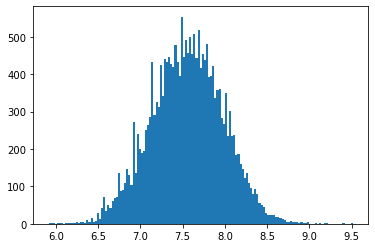

In [26]:
housing_df['log_sqft_living'] = np.log(housing_df['sqft_living']) 
plt.hist(housing_df['log_sqft_living'], bins=std_bins);
# looks much better

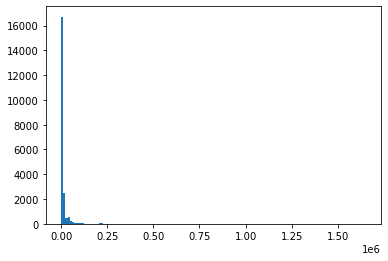

In [27]:
plt.hist(housing_df['sqft_lot'], bins=std_bins);
# okay, that's a pretty wild distribution, heavily skewed by outliers
# definitely needs a log transformation and to lop off the outliers

<ipython-input-53-aa4f1bcdf8cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['log_sqft_lot'] = np.log(housing_df['sqft_lot'])


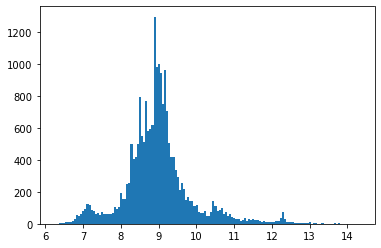

In [53]:
housing_df['log_sqft_lot'] = np.log(housing_df['sqft_lot'])
plt.hist(housing_df['log_sqft_lot'], bins=std_bins);
# wierd distribution

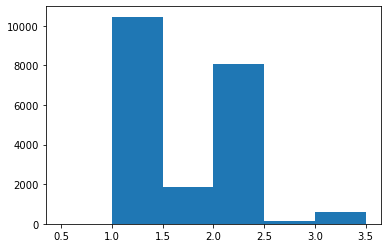

In [29]:
bins = np.array(range(1, 8)) * .5
plt.hist(housing_df['floors'], bins=bins);
# These split level homes may just be adding in noise, 
# but also they could be signifying something, like maybe the
# homes were built in more scenic hillier places as 
# a necessity, we'll check that out later
# but that data may be caught better in view, so maybe that doesn't matter

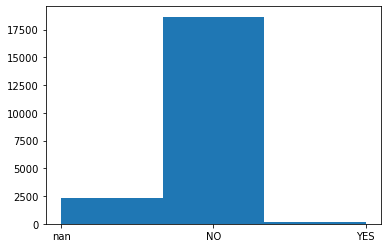

In [30]:
plt.hist(housing_df['waterfront'], bins=3);
# here we see the vast majority of homes aren't on a waterfront,
# and that nan actually outnumbers the few houses with an affirmative

In [31]:
# we'll drop the na values
housing_df.dropna(subset=['view'], axis=0, inplace=True)

<ipython-input-31-b3699e5e83f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df.dropna(subset=['view'], axis=0, inplace=True)


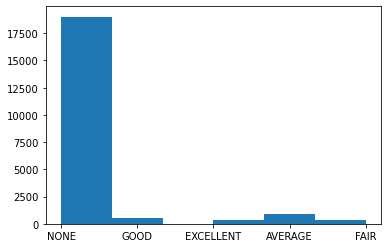

In [32]:
plt.hist(housing_df['view'], bins=6);
# we see here the vast majority of houses have no ranked view
# we'll decide later if we want this feature or not

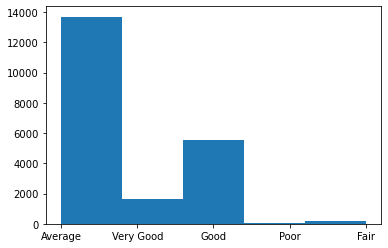

In [33]:
plt.hist(housing_df['condition'], bins=5);
# this one may actually be fairly normally distributed once the
# categories are correctly arranged, obviously with a right skew though

In [34]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price',
       'log_bedrooms', 'log_sqft_living', 'log_sqft_lot'],
      dtype='object')

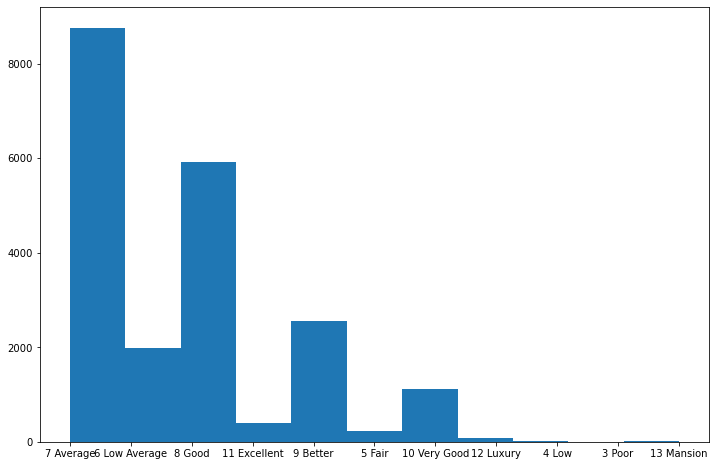

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(housing_df['grade'], bins=11);
# there are 11 different categories here with actual data points,
# and it looks like it will sort into a vaguely normal distribution

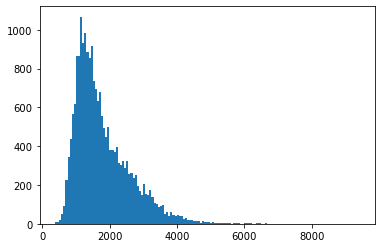

In [36]:
plt.hist(housing_df['sqft_above'], bins=std_bins);
# once again, log transform would be wise

<ipython-input-37-e5e7afa02310>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['log_sqft_above'] = np.log(housing_df['sqft_above'])


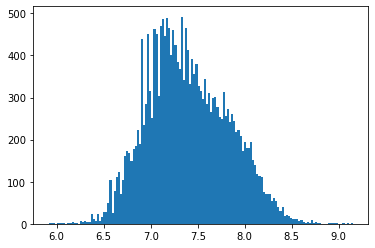

In [37]:
housing_df['log_sqft_above'] = np.log(housing_df['sqft_above'])
plt.hist(housing_df['log_sqft_above'], bins=std_bins);
# definitely a little better

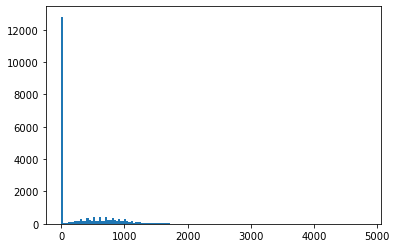

In [38]:
plt.hist(housing_df['sqft_basement'], bins=std_bins);
# the vast majority of houses don't have a basement, but this could be useful somehow

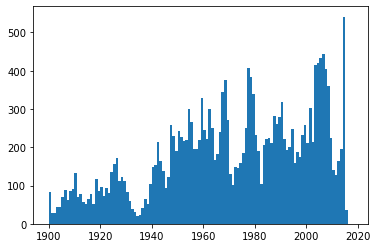

In [39]:
plt.hist(housing_df['yr_built'], bins=range(1900, 2019));
# made the bins fit to each year
# almost oscillating pattern to the year built

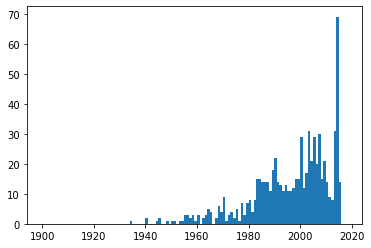

In [40]:
plt.hist(housing_df['yr_renovated'], bins=range(1900, 2019));
# yeah, not distributed normally at all, may not be useful data,
# or maybe it will still give us accuracy despite failing to meet 
# assumptions of values

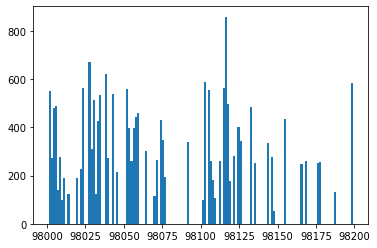

In [41]:
plt.hist(housing_df['zipcode'], bins=std_bins);
# We'll need to figure out how to group these zipcodes,
# but they could definitely be useful

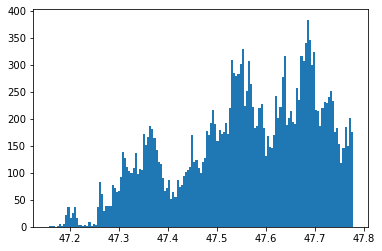

In [42]:
plt.hist(housing_df['lat'], bins=std_bins);
# Once again, not super normal, but could be useful
# but may be able to capture this data better with zip or something

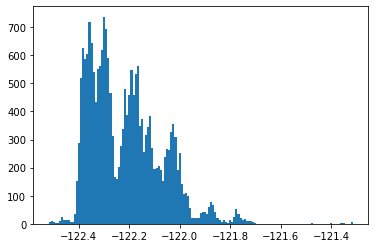

In [43]:
plt.hist(housing_df['long'], bins=std_bins);
# this one was less correlated with anything, so would be okay just dropping

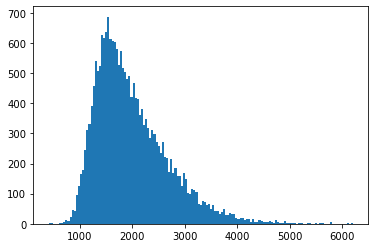

In [44]:
plt.hist(housing_df['sqft_living15'], bins=std_bins);
# definitely needs a log transformation

<ipython-input-45-a45096259bfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['log_sqft_living15'] = np.log(housing_df['sqft_living15'])


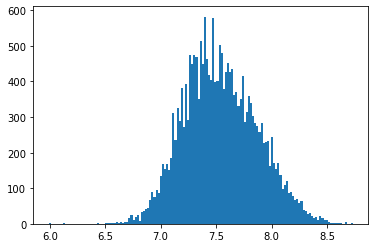

In [45]:
housing_df['log_sqft_living15'] = np.log(housing_df['sqft_living15'])
plt.hist(housing_df['log_sqft_living15'], bins=std_bins);
# much better

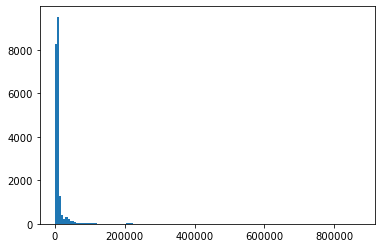

In [46]:
plt.hist(housing_df['sqft_lot15'], bins=std_bins);
# once again, you'll probably need to log it and lop off the outliers

<ipython-input-52-57b5dc097b4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['log_sqft_lot15'] = np.log(housing_df['sqft_lot15'])


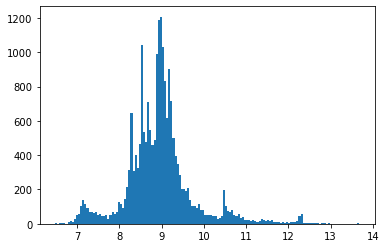

In [52]:
housing_df['log_sqft_lot15'] = np.log(housing_df['sqft_lot15'])
plt.hist(housing_df['log_sqft_lot'], bins=std_bins);
# still kind of funky, but definitely bettter

In [ ]:
housing_df.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split

In [49]:
X = housing_df.drop(columns=['price', 'log_price'])
y = housing_df[['log_price']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [55]:
train_df.corr()['log_price'].sort_values(ascending=False)

log_price            1.000000
sqft_living          0.696151
log_sqft_living      0.675679
sqft_living15        0.625905
log_sqft_living15    0.613268
sqft_above           0.601551
log_sqft_above       0.585870
bathrooms            0.552021
lat                  0.447242
bedrooms             0.359055
log_bedrooms         0.350322
sqft_basement        0.318942
floors               0.308782
log_sqft_lot         0.124233
yr_renovated         0.115663
sqft_lot             0.103119
sqft_lot15           0.093834
yr_built             0.082902
long                 0.057513
id                  -0.006480
zipcode             -0.043328
Name: log_price, dtype: float64

In [60]:
model = LinearRegression()
slr = model.fit(X_train[['sqft_living']], y_train)
slr.score(X_train[['sqft_living']], y_train), slr.coef_, slr.intercept_

(0.48462690104233674, array([[0.00039931]]), array([12.21684663]))

# Meir's cleaning process

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
%matplotlib inline

In [2]:
housing_df = pd.read_csv('./data/kc_house_data.csv', parse_dates=[1])

In [3]:
pd.set_option('display.max_columns', None)
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
ren_col = housing_df[['yr_renovated']]
imputer = SimpleImputer(strategy='constant', fill_value = 0)
imputer.fit(ren_col)
ren_imputed = imputer.transform(ren_col)
housing_df.yr_renovated = ren_imputed

In [5]:
housing_df['grade'] = housing_df['grade'].str[0:2].str.strip().astype(int)

In [6]:
housing_df['year_sold'] = housing_df['date'].dt.year
housing_df['age_when_sold'] = housing_df['year_sold'] - housing_df['yr_built']

In [8]:
housing_df['sqft_basement'] = housing_df['sqft_living'] - housing_df['sqft_above']
housing_df['basement'] = housing_df['sqft_basement'].map(lambda x: True if x > 0 else False)
housing_df['basement'] = housing_df['basement'].astype(int)

In [9]:
housing_df_clean = housing_df.drop(['date', 'grade','sqft_basement','sqft_above','yr_built', 'year_sold', 'yr_renovated', 'lat', 'long'], axis=1)
housing_df_clean

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,sqft_living15,sqft_lot15,age_when_sold,basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,98178,1340,5650,59,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,98125,1690,7639,63,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,98028,2720,8062,82,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,98136,1360,5000,49,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,98074,1800,7503,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,98103,1530,1509,5,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,98146,1830,7200,1,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,98144,1020,2007,5,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,98027,1410,1287,11,0


In [11]:
X = housing_df_clean.drop(columns = 'price', axis=1)
y = housing_df_clean['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
view_col = X_train[['view']]
imputer_view = SimpleImputer(strategy='constant', fill_value = 'NONE')
imputer_view.fit(view_col)
view_imputed = imputer_view.transform(view_col)
X_train.view = view_imputed

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
view_col = X_test[['view']]
view_imputed = imputer_view.transform(view_col)
X_test.view = view_imputed

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [30]:
def res_plots(model, X_train, X_test, y_train, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_resids = y_train - train_preds
    test_resids = y_test - test_preds
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9, 18), nrows=3)
    sns.histplot(test_resids, kde=True, ax=ax1)
    sm.qqplot(test_resids, line='r', ax=ax2)
    sns.residplot(x=X_test, y=y_test, ax=ax3)
    return plt.show()

In [19]:
fsm = LinearRegression()
fsm.fit(X_train[['sqft_living']], y_train)

LinearRegression()

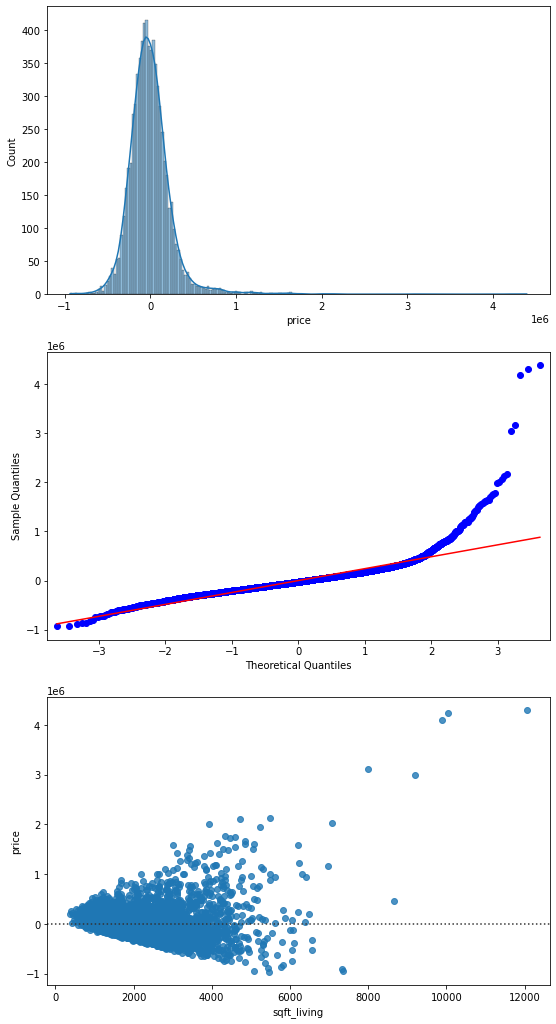

In [31]:
res_plots(fsm, X_train[['sqft_living']], X_test[['sqft_living']], y_train, y_test)

In [ ]:
def model_stats():
    